In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
print(len(cities))

621


In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | paragominas
Processing Record 6 of Set 1 | amazar
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | haibowan
City not found. Skipping...
Processing Record 9 of Set 1 | samagaltay
Processing Record 10 of Set 1 | porbandar
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | veraval
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | airai
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | shingu
Processing Record 18 of Set 1 | kirakira
Processing Record 19 of Set 1 | kahului
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | hamilton
Processing Record 22 of Set 1 | abnub
Processing Recor

Processing Record 33 of Set 4 | teya
Processing Record 34 of Set 4 | nizhniy tsasuchey
Processing Record 35 of Set 4 | kulhudhuffushi
Processing Record 36 of Set 4 | ugrinovci
Processing Record 37 of Set 4 | utiroa
City not found. Skipping...
Processing Record 38 of Set 4 | keti bandar
Processing Record 39 of Set 4 | rafaela
Processing Record 40 of Set 4 | saint-philippe
Processing Record 41 of Set 4 | sur
Processing Record 42 of Set 4 | nyimba
Processing Record 43 of Set 4 | kavieng
Processing Record 44 of Set 4 | hobart
Processing Record 45 of Set 4 | herat
Processing Record 46 of Set 4 | namanga
Processing Record 47 of Set 4 | lebu
Processing Record 48 of Set 4 | talara
Processing Record 49 of Set 4 | eldikan
City not found. Skipping...
Processing Record 50 of Set 4 | ambikapur
Processing Record 1 of Set 5 | saint-pierre
Processing Record 2 of Set 5 | los llanos de aridane
Processing Record 3 of Set 5 | san felipe
Processing Record 4 of Set 5 | yellowknife
Processing Record 5 of Set

Processing Record 23 of Set 8 | toshkivka
Processing Record 24 of Set 8 | gat
Processing Record 25 of Set 8 | mglin
Processing Record 26 of Set 8 | quatre cocos
Processing Record 27 of Set 8 | pemangkat
Processing Record 28 of Set 8 | agadir
Processing Record 29 of Set 8 | santa rosa
Processing Record 30 of Set 8 | marienburg
Processing Record 31 of Set 8 | mayor pablo lagerenza
Processing Record 32 of Set 8 | santa clarita
Processing Record 33 of Set 8 | sofiysk
City not found. Skipping...
Processing Record 34 of Set 8 | minot
Processing Record 35 of Set 8 | mount isa
Processing Record 36 of Set 8 | ancud
Processing Record 37 of Set 8 | bambous virieux
Processing Record 38 of Set 8 | kristianstad
Processing Record 39 of Set 8 | itoman
Processing Record 40 of Set 8 | sitrah
Processing Record 41 of Set 8 | arlit
Processing Record 42 of Set 8 | leshukonskoye
Processing Record 43 of Set 8 | phalodi
Processing Record 44 of Set 8 | soyo
Processing Record 45 of Set 8 | rognan
Processing Reco

Processing Record 10 of Set 12 | srednekolymsk
Processing Record 11 of Set 12 | sao jose da coroa grande
Processing Record 12 of Set 12 | inuvik
Processing Record 13 of Set 12 | nawa
Processing Record 14 of Set 12 | geraldton
Processing Record 15 of Set 12 | mana
Processing Record 16 of Set 12 | marawi
Processing Record 17 of Set 12 | alexandria
Processing Record 18 of Set 12 | castelo do piaui
Processing Record 19 of Set 12 | hasaki
Processing Record 20 of Set 12 | upington
Processing Record 21 of Set 12 | mareeba
Processing Record 22 of Set 12 | kalmar
Processing Record 23 of Set 12 | masterton
Processing Record 24 of Set 12 | san rafael
Processing Record 25 of Set 12 | ossora
Processing Record 26 of Set 12 | yumbe
Processing Record 27 of Set 12 | brokopondo
Processing Record 28 of Set 12 | barra do garcas
Processing Record 29 of Set 12 | exeter
Processing Record 30 of Set 12 | sataua
City not found. Skipping...
Processing Record 31 of Set 12 | filadelfia
Processing Record 32 of Set 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,54.72,88,52,4.61,ZA,2021-09-28 23:55:08
1,Tuktoyaktuk,69.4541,-133.0374,33.80,100,90,12.66,CA,2021-09-28 23:55:08
2,Ushuaia,-54.8000,-68.3000,46.06,49,75,21.85,AR,2021-09-28 23:54:38
3,Bluff,-46.6000,168.3333,48.79,82,72,22.82,NZ,2021-09-28 23:55:08
4,Paragominas,-2.9667,-47.4833,73.56,93,72,2.19,BR,2021-09-28 23:55:09
5,Amazar,53.8580,120.8750,36.88,75,100,4.63,RU,2021-09-28 23:55:09
6,Provideniya,64.3833,-173.3000,33.91,93,90,13.42,RU,2021-09-28 23:55:09
7,Samagaltay,50.6022,95.0047,24.78,49,42,2.15,RU,2021-09-28 23:55:09
8,Porbandar,21.6422,69.6093,78.53,87,100,6.26,IN,2021-09-28 23:55:10
9,Upernavik,72.7868,-56.1549,25.66,52,44,4.90,GL,2021-09-28 23:55:10


In [11]:
reorder_city_data = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[reorder_city_data]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2021-09-28 23:55:08,-34.5322,20.0403,54.72,88,52,4.61
1,Tuktoyaktuk,CA,2021-09-28 23:55:08,69.4541,-133.0374,33.80,100,90,12.66
2,Ushuaia,AR,2021-09-28 23:54:38,-54.8000,-68.3000,46.06,49,75,21.85
3,Bluff,NZ,2021-09-28 23:55:08,-46.6000,168.3333,48.79,82,72,22.82
4,Paragominas,BR,2021-09-28 23:55:09,-2.9667,-47.4833,73.56,93,72,2.19
5,Amazar,RU,2021-09-28 23:55:09,53.8580,120.8750,36.88,75,100,4.63
6,Provideniya,RU,2021-09-28 23:55:09,64.3833,-173.3000,33.91,93,90,13.42
7,Samagaltay,RU,2021-09-28 23:55:09,50.6022,95.0047,24.78,49,42,2.15
8,Porbandar,IN,2021-09-28 23:55:10,21.6422,69.6093,78.53,87,100,6.26
9,Upernavik,GL,2021-09-28 23:55:10,72.7868,-56.1549,25.66,52,44,4.90


In [12]:
# Create the output file (CSV).
output_data_file = "Weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

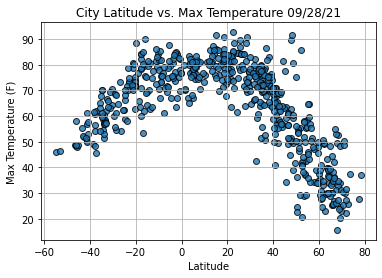

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

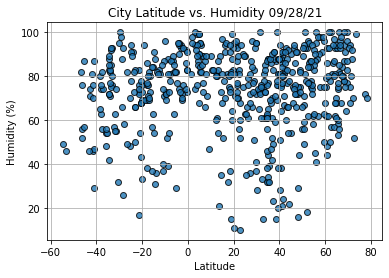

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

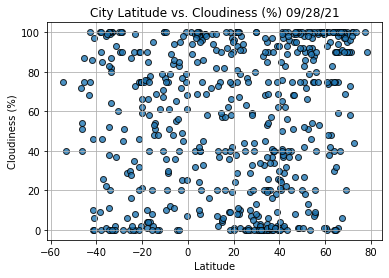

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

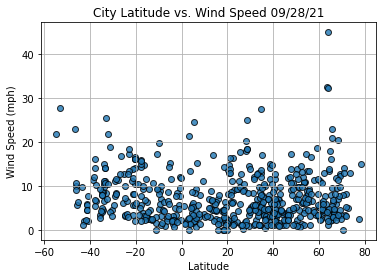

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [19]:
index13 = city_data_df.loc[13]
index13

City                        Airai
Country                        TL
Date          2021-09-28 23:55:11
Lat                       -8.9266
Lng                      125.4092
Max Temp                    73.13
Humidity                       39
Cloudiness                     29
Wind Speed                   3.06
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4      False
       ...  
561    False
562     True
563     True
564    False
565     True
Name: Lat, Length: 566, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Tuktoyaktuk,CA,2021-09-28 23:55:08,69.4541,-133.0374,33.80,100,90,12.66
5,Amazar,RU,2021-09-28 23:55:09,53.8580,120.8750,36.88,75,100,4.63
6,Provideniya,RU,2021-09-28 23:55:09,64.3833,-173.3000,33.91,93,90,13.42
7,Samagaltay,RU,2021-09-28 23:55:09,50.6022,95.0047,24.78,49,42,2.15
8,Porbandar,IN,2021-09-28 23:55:10,21.6422,69.6093,78.53,87,100,6.26


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Tuktoyaktuk,CA,2021-09-28 23:55:08,69.4541,-133.0374,33.80,100,90,12.66
5,Amazar,RU,2021-09-28 23:55:09,53.8580,120.8750,36.88,75,100,4.63
6,Provideniya,RU,2021-09-28 23:55:09,64.3833,-173.3000,33.91,93,90,13.42
7,Samagaltay,RU,2021-09-28 23:55:09,50.6022,95.0047,24.78,49,42,2.15
8,Porbandar,IN,2021-09-28 23:55:10,21.6422,69.6093,78.53,87,100,6.26
9,Upernavik,GL,2021-09-28 23:55:10,72.7868,-56.1549,25.66,52,44,4.90
11,Veraval,IN,2021-09-28 23:55:11,20.9000,70.3667,77.83,94,100,14.76
15,Shingu,JP,2021-09-28 23:55:11,33.7333,135.9833,76.19,85,68,9.64
17,Kahului,US,2021-09-28 23:55:12,20.8947,-156.4700,83.46,82,38,13.00
19,Hamilton,US,2021-09-28 23:55:12,39.1834,-84.5333,76.24,76,1,4.85


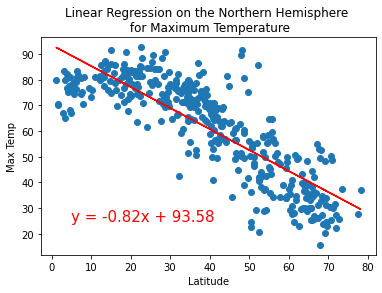

In [23]:
# Linear regression on the Northern Hemisphere -- Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (5,25))

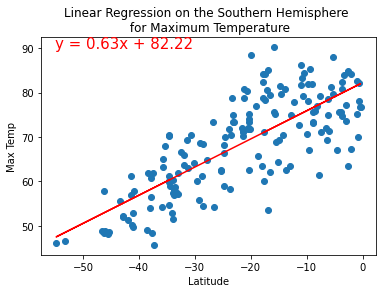

In [24]:
# Linear regression on the Southern Hemisphere -- Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                        'Max Temp', (-55,90))

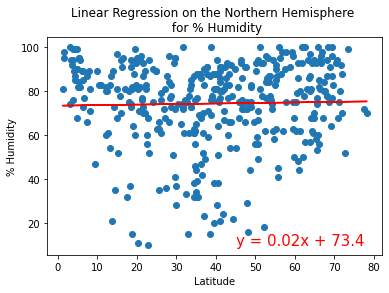

In [25]:
# Linear regression on the Northern Hemisphere -- Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity', (45,10))

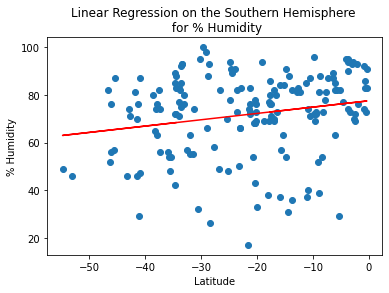

In [26]:
# Linear regression on the Southern Hemisphere -- Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity', (-56,8))

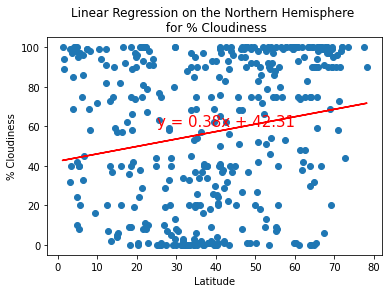

In [27]:
# Linear regression on the Northern Hemisphere -- Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (25,60))

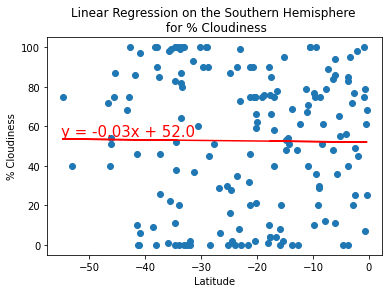

In [28]:
# Linear regression on the Southern Hemisphere -- Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (-55,55))

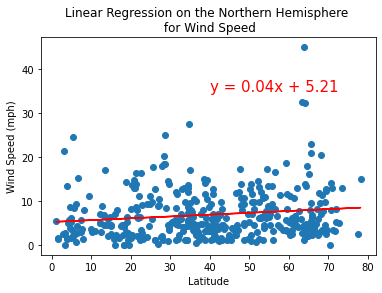

In [29]:
# Linear regression on the Northern Hemisphere -- Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed (mph)', (40,35))

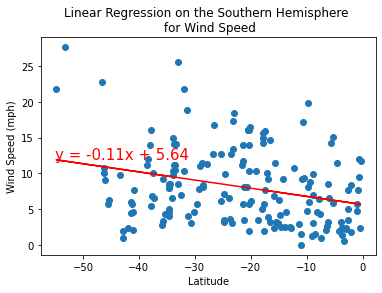

In [30]:
# Linear regression on the Southern Hemisphere -- Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed (mph)', (-55,12))